# `Материалы кафедры ММП факультета ВМК МГУ. Введение в глубокое обучение.`

# `Лекция 12. Неявные представления в 3Д`

### `Материалы составил Мишан Алиев на основе работ Кирилла Струминского.`

#### `Москва, Весенний семестр 2025`

`Ссылки`
- [Мишан Алиев](https://www.hse.ru/org/persons/885876805/), [Кирилл Струминский](https://www.hse.ru/org/persons/165140955)
- Слайды взяты из [лекции курса "3D CV" на ФКН](https://github.com/struminsky/hse_3dcv/blob/main/week_6/lecture/lecture_6.pdf)
- Park, Jeong Joon, et al. ["Deepsdf: Learning continuous signed distance functions for shape representation."](https://arxiv.org/abs/1901.05103) Proceedings of the IEEE/CVF conference on computer vision and pattern recognition. 2019. Cited by 4238.
- Mildenhall, Ben, et al. ["Nerf: Representing scenes as neural radiance fields for view synthesis."](https://arxiv.org/abs/2003.08934) Communications of the ACM 65.1 (2021): 99-106. Cited by 11808.
- Sitzmann, Vincent, et al. ["Implicit neural representations with periodic activation functions."](http://arxiv.org/abs/2006.09661) Advances in neural information processing systems 33 (2020): 7462-7473. Cited by 2963.
- Yu, Alex, et al. ["Plenoxels: Radiance fields without neural networks."](https://arxiv.org/abs/2112.05131) arXiv preprint arXiv:2112.05131 2.3 (2021): 6. Cited by 202.
- Müller, Thomas, et al. ["Instant neural graphics primitives with a multiresolution hash encoding."](https://arxiv.org/abs/2201.05989) ACM transactions on graphics (TOG) 41.4 (2022): 1-15. Cited by 4269.
- Yu, Alex, et al. ["pixelnerf: Neural radiance fields from one or few images."](https://arxiv.org/abs/2012.02190) Proceedings of the IEEE/CVF conference on computer vision and pattern recognition. 2021. Cited by 1877.
- Kerr, Justin, et al. ["Lerf: Language embedded radiance fields."](https://arxiv.org/abs/2303.09553) Proceedings of the IEEE/CVF International Conference on Computer Vision. 2023. Cited by 397.
- Li, Ruilong, Matthew Tancik, and Angjoo Kanazawa. ["Nerfacc: A general nerf acceleration toolbox."](https://arxiv.org/abs/2210.04847) arXiv preprint arXiv:2210.04847 (2022). Cited by 98.
- Barron, Jonathan T., et al. ["Mip-nerf: A multiscale representation for anti-aliasing neural radiance fields."](https://arxiv.org/abs/2103.13415) Proceedings of the IEEE/CVF international conference on computer vision. 2021. Cited by 2187.
- Barron, Jonathan T., et al. ["Mip-nerf 360: Unbounded anti-aliased neural radiance fields."](https://arxiv.org/abs/2111.12077) Proceedings of the IEEE/CVF conference on computer vision and pattern recognition. 2022. Cited by 1912.
- Zhang, Kai, et al. ["Nerf++: Analyzing and improving neural radiance fields."](https://arxiv.org/abs/2010.07492) arXiv preprint arXiv:2010.07492 (2020). Cited by 1124.
- Barron, Jonathan T., et al. ["Zip-nerf: Anti-aliased grid-based neural radiance fields."](https://arxiv.org/abs/2304.06706) Proceedings of the IEEE/CVF International Conference on Computer Vision. 2023. Cited by 547.
- Park, Keunhong, et al. ["Camp: Camera preconditioning for neural radiance fields."](https://arxiv.org/abs/2308.10902) ACM Transactions on Graphics (TOG) 42.6 (2023): 1-11. Cited by 58.

## `Preliminaries`

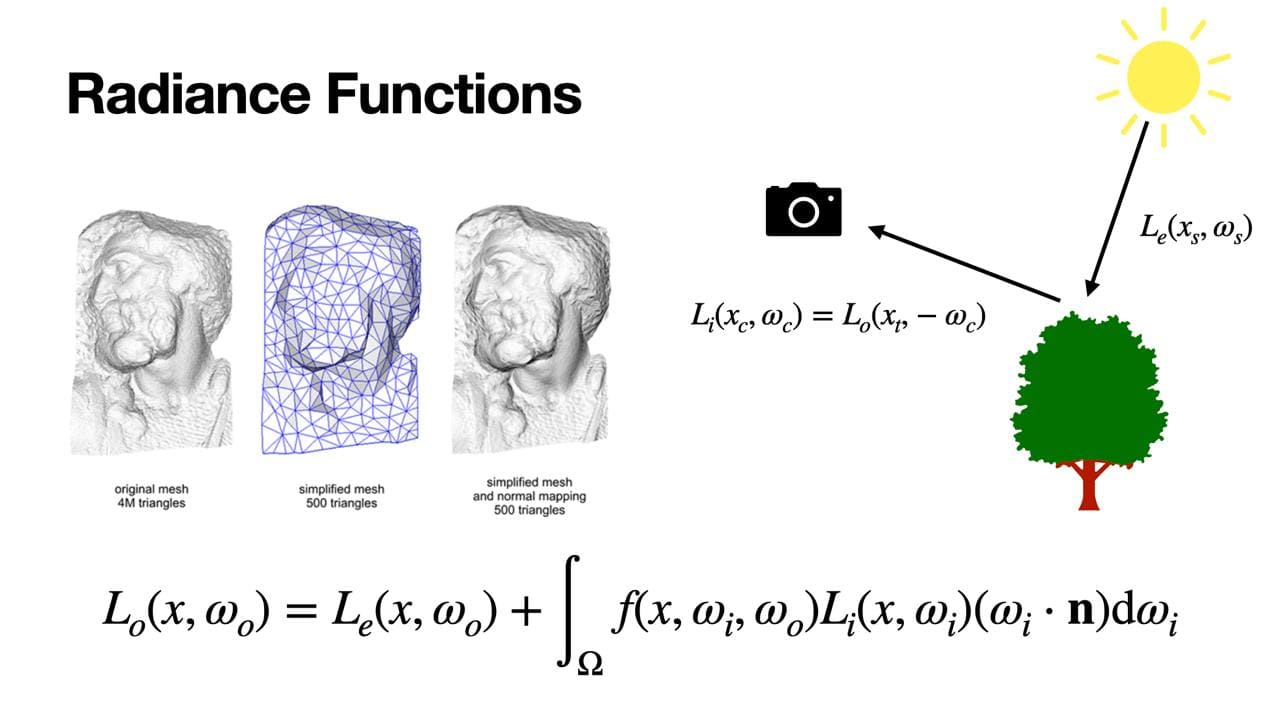

Попытаемся воспроизвести физический процесс формирования изображения. 

Можно говорить о физической симуляции, когда фотоны из источника света летают по сцене и прилетают в камеру, а можно говорить про математический аппарат, который описывает эту процедуру с помощью непрерывного интегрального уравнения, написанного внизу.

Оно связывает несколько видов функции светимости: L_o — outgoing — исходящая, L_e — emitted — испущенная, L_i - incoming — входящая. Это интегральное уравнение говорит, о том, что сколько света вышло из точки и состоит из двух слагаемых: сколько света сама точка испустила и сколько света было отражено, пришедшего из разных направлений (имеем интеграл по направлениям, из которых пришел свет). 

Само уравнение возникать скорее  не будет, мы будем говорить про алгоритмы, которые будут стараться эту функцию светимости выучить из сырых данных.

В контексте функций светимости стоит добавить про карты нормалей. Вообще одну и ту же картинку, которую мы видим глазами, мы можем получить несколькими способами. Карты нормалей могут передавать сложную геометрию в рамках простой геометрии. На картинке есть скан древней статуи, то, какой формой она обладает. Дальше запустили алгоритм, который упрощает эту сетку и находит низкополигональную сетку, которую проще хранить и рисовать. Справа же нарисована эта низкополигональная сетка только с картой нормалей у каждого треугольника, которая примерная имитириует реальную сложную поверхность (там более сложная функция светимости, чем у простого треугольника). За счет более сложных зависимостей в функции светимости можно создавать иллюзию более сложной структуры, чем она есть на самом деле.


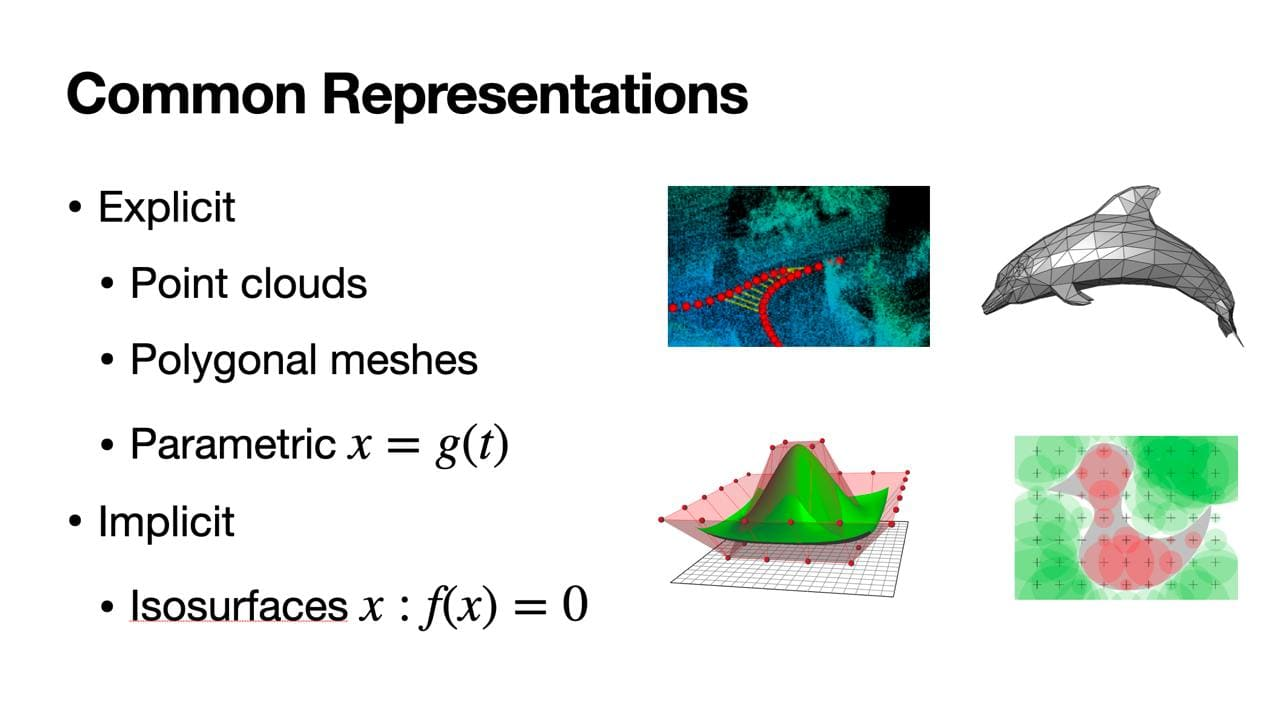

Как правило представление трехмерных данных делят на два типа: явное и неявное. Явное позволяют получить точку на поверхности простым и явным способом.

Первый вариант — облака точек, которые представляют сцену набором точек, образующих их. Например, это датчики типа Lidar на беспилотниках, которые собирают эти данные. Есть проблема, мы не понимаем, где дыры и проблемы в данных, так как поверхности как таковой нет.

Полигональные сетки — объект состоит из треугольников, образованных вершинами сетки. То есть это наборы точек и способы их соединения. Как правило, это треугольники. Такие данные трудно восстанавливать, потому что не оч понятно, как объекта покрывать треугольниками.

Параметрическая сетка — берем значение параметра, вычисяляем для значения параметра функцию, описывающую поверхность линии уровня и получаем фигуру. Позволяют представить бесконечно гладкие фигуры. Не так часто встречаются в приложения, так как часто сложную фигуру так параметризовать сложно.

С другой стороны есть неявное представление, где мы не можем просто так взять и посмотреть на точки поверхности объекта. Классическое представление — функция линий уровня, она возвращает значения для каждой точки пространства. Поверхность — множество точек, где у функции какое-то конкретное значение. На основе таких представлений заработала трехмерная реконструкция.


## `Fields for Volumetric Representations`

О неявных представлениях в наше время говорят в терминах полей. Давайте поговорим о них.


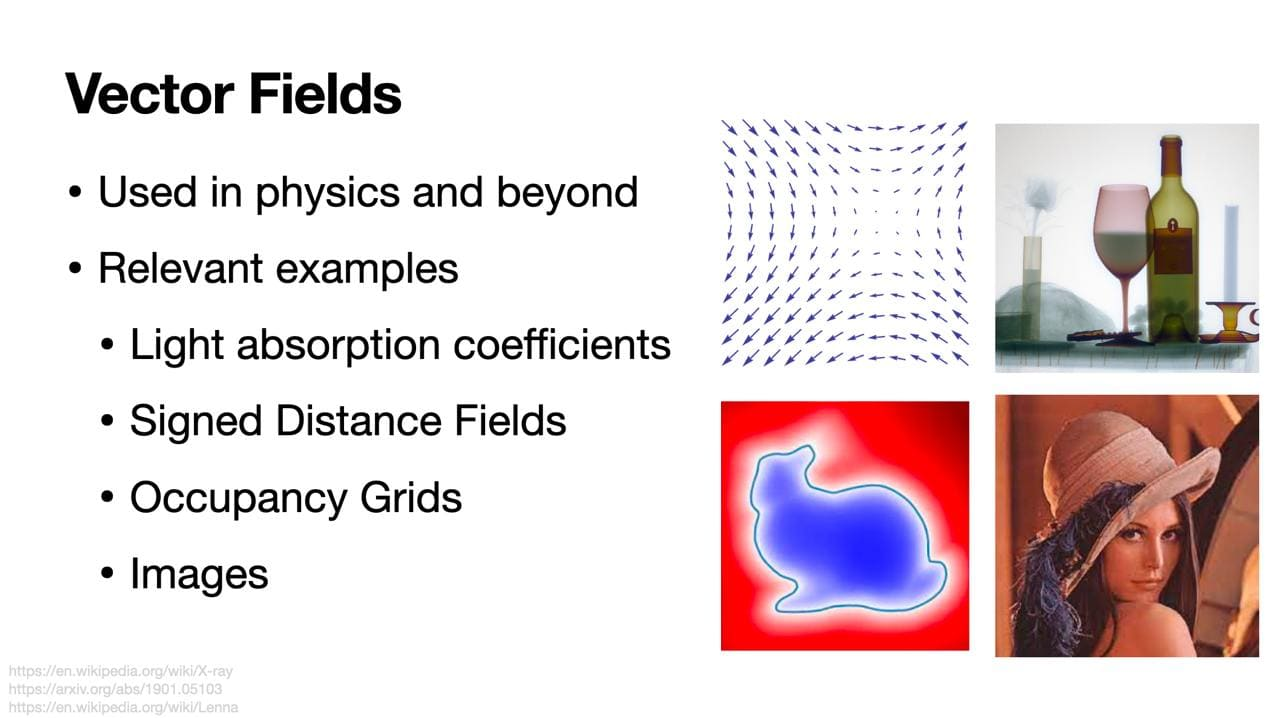

Поле — термин физиков для описания взаимодействий и сил. Грубо говоря, это функция, которая точке пространства сопоставляет либо вектор, либо число. Например, в физике сила земного притяжения описывается неким полем сил, где в каждой точке пишем направление притяжения.

Это довольно удобный инструмент, которым можно описывать много разных эффектов, в том числе и фигуры:
можно записать поле коэффициентов, которое каждой точке пространства будет сопоставлять, сколько точка поглощает свет. Картинка с вином: просветили рентгеновскими лучами сцену насквозь, стекло поглощает света больше, поэтому имеем такое представление.
если говорить про фигуры, то можно говорить по [SDF = signed distant field](https://arxiv.org/abs/1901.05103). Фигуру можно задать как линии уровня, то есть сказать, что есть какая-то функция, которая равна 0 на поверхности этой фигуры, также в каждой точке пространства записано расстояние до ближайшей точки на поверхности описываемой фигуры.
Occupancу grid — поля занятости — 1, где фигура плотная, 0, где фигуры нет.  
Поле может описывать изображение - выдаем три числа в каждой точке картинки, формируя изображение.

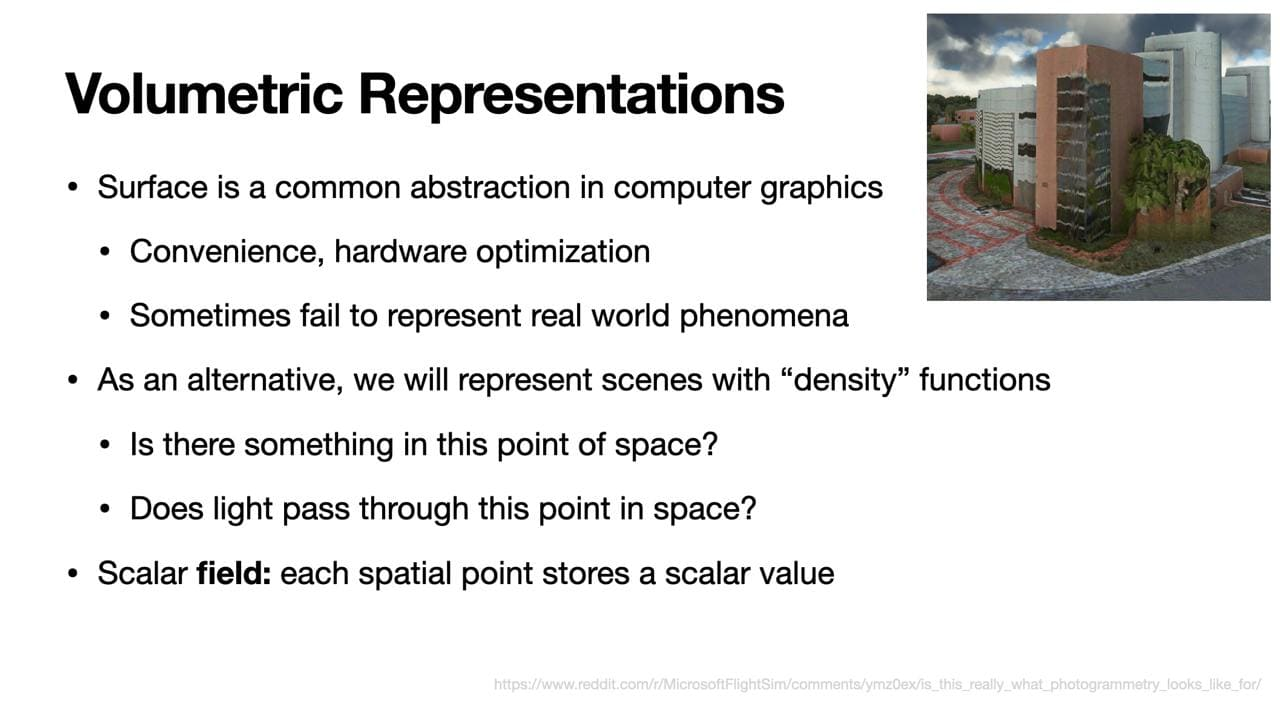

Почему нельзя описать все полигональными сетками? Фрактальные структуры или с мелкой детализацией потребуют много ресурсов, чтобы их описать. 

Скриншот из игры Microsoft Flight Simulator, где все представлено полигонами. Проблема в деревьях, листочках.

Объемным представлениями проще. Фрактальные структуры можно описать проще просто математикой, так как задаем линии уровня. 

Также проще задавать объемные фигуры, например, облака, где не очень понятна, где поверхность (плотен в центре, непонятны границы): можем просто задавать поглощение света в разных местах (в центре побольше, на краях поменьше).

Еще пример — волосы, их тоже представляют объемным представлением.

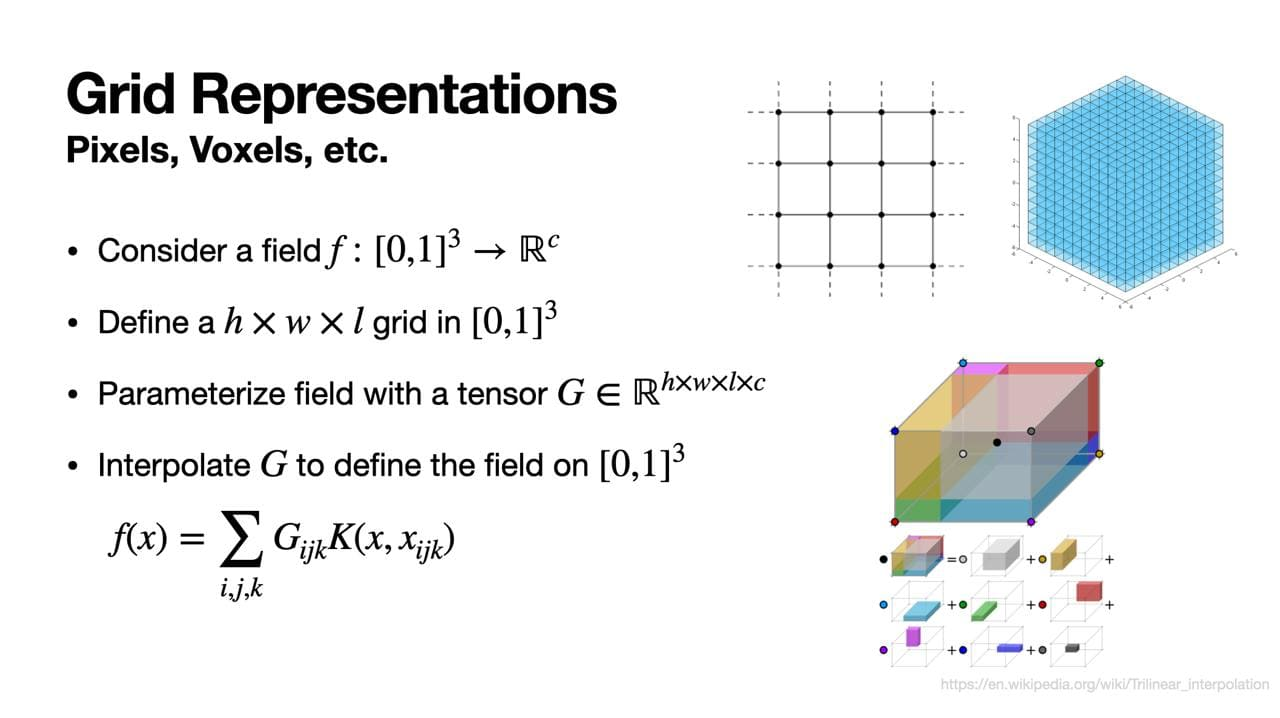

Как параметризовать/задать поля? Самое наивное — задать единичный куб, в котором находится сцена. Дальше побить на маленькие кубики, завести решетку и в каждом узле решетки вписать число, которое будет говорить, насколько плотно значение поля в вершине этого кубика.

Задается классическим тензором размера (h, w, l). Также надо ввести один доп размер — количество канадов представления (скалярное поле — c=1, цвета — c=3).

Если теперь хотим поле на всем объеме — описываем значение поля в пространстве линейной интерполяцией — с какими-то весами складывать значения в узлах маленьких решеток (веса зависят от расстояния точки до узлов).

Проблема — если хотим детальную сцену, нужно много узлов, что требует много памяти, хотя все считается быстро и точно. Чисто сеточное представление не так популярно в графике. 

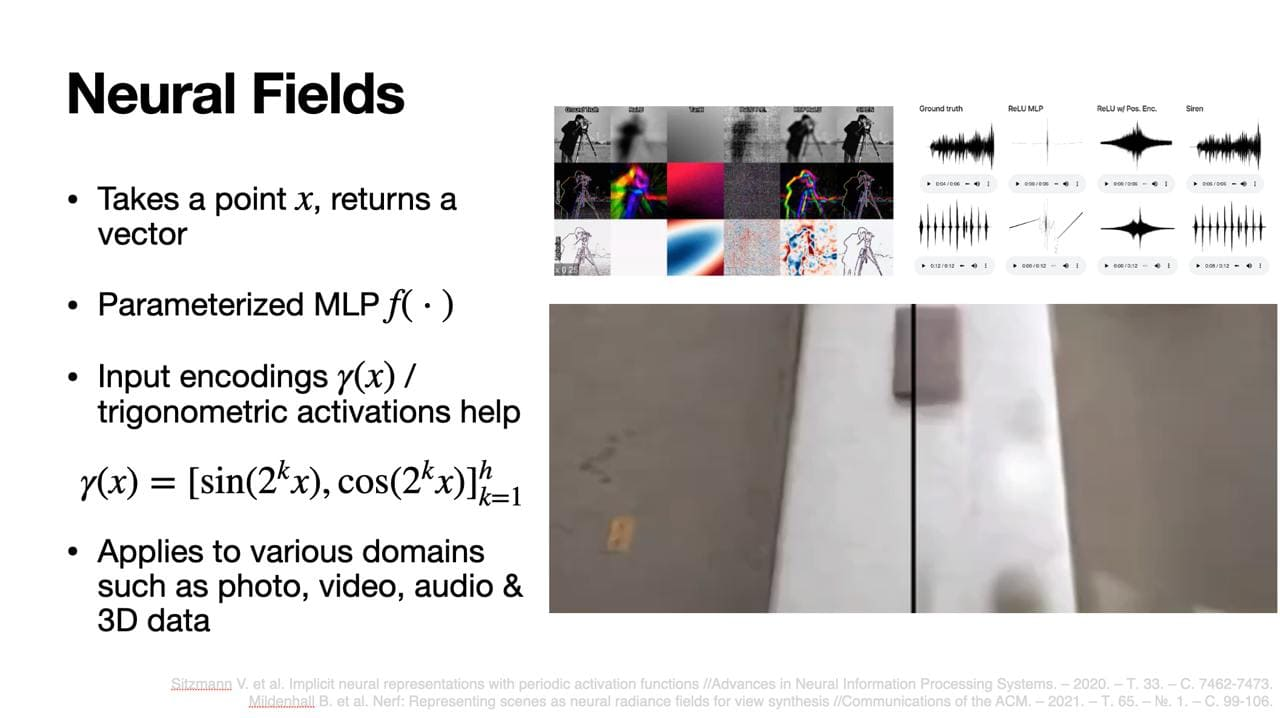

Можно найти более экономное представление для полей, используя DL. Здесь нейронка — алгоритм сжатия данных. Она, например, по координате пикселя картинки будет выдавать ее цвет.

Вообще можно так зранить данные различных доменов. Например, видео. У нас есть координата на экране и момент времени, можем пытаться возвращать цвет пикселя в этот момент времени в этой точке экрана. Странное решение, но так можно.

Достаточно обычной [MLP](https://arxiv.org/abs/2003.08934). Обучается с помощью обычного градиентного спуска.

Важно еще использовать специальные позиционные энкодинги для координат. Практика показывает, что с ним учится быстрее и лучше. Они такие же, как и в трансформерах. На выходе те же [0,1], но если есть небольшое изменение координаты, то обычная сесть даст небольшое изменение выхода (гладкое поведение), а такой энкодинг сильно изменит sin() и cos(), что является хорошим признаком резких переходов для модели. С ними учится лучше. 

На слайде [пример](https://arxiv.org/abs/2006.09661), где авторы предложили обычные активации заменить на синусы и косинусы, получается хорошее представление. Обычно конкатеринируется x c этими энкодингами.

Дешевле по памяти, чем решетки. Несколько мегабайт. Правда не всегда контролируем потерю информации сцены, в отличие от классических способов сжатия данных, как JPEG. Еще минусы — декодирование дорогое, так как какждый раз надо вызывать много раз нейронку.

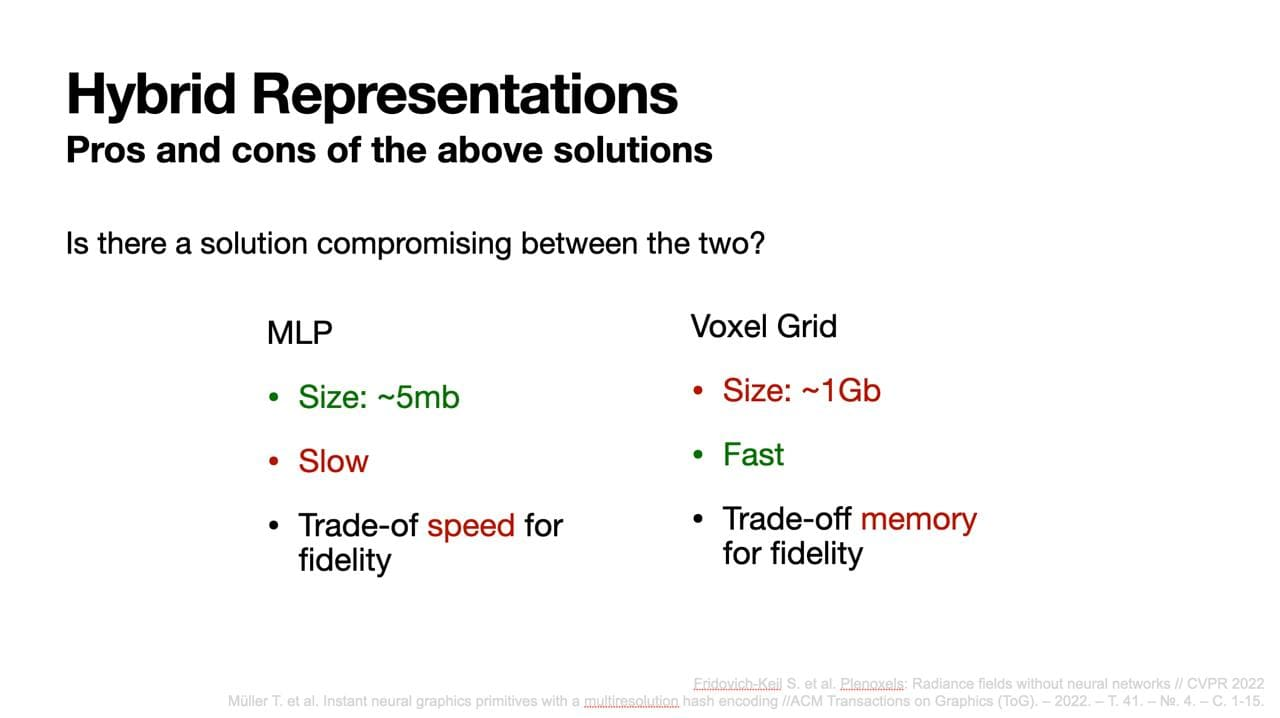

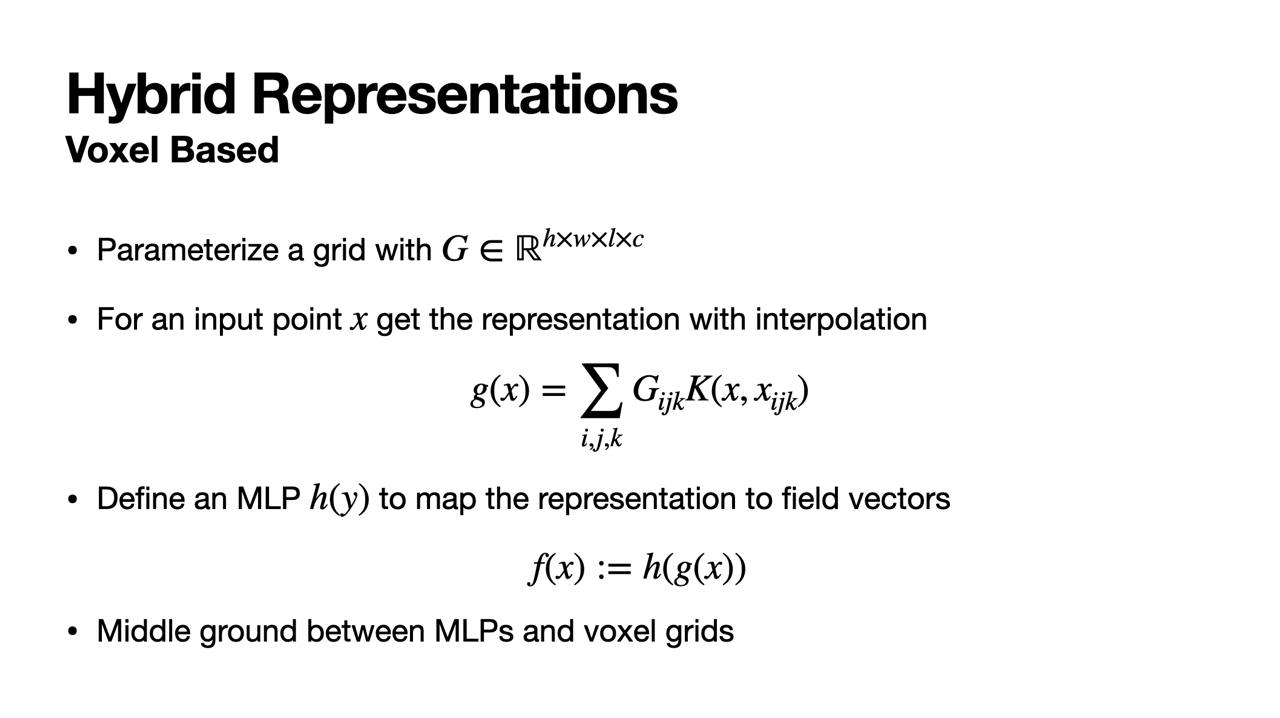

Не хотим хранить сетку высокого разрешения, но MLP тоже не хочется. Будем искать решение посередине. 

Параметризуем наше поле не скалярными значениями, а С числами, которые будут эмбеддингами данной точки пространства. А дальше в точке пространства будем считать значение эмбеддингов, интерполируемое из ближайших узлов, а потом завести доп сеть, которая по эмбеддингам в окрестности будет возвращать значение поля. Сетка берется четь менее точного разрешения, так как часть инфы может додумать MLP по эмбеддингам.

Эмбеддинг — это числа, зависящие от координат пространства, в них больше инфы, поэтому и сеть может быть меньше, так как она только обрабатывает инфу, а не хранит ее в себе.

Все дифференцируемо и настраивается. Меньше памяти и быстрее работает.

Значения в узлах мы выучиваем. Можно в сеть, которая обрабатывает эмбеддинги, можно подавать доп инфу, например, нам нужен цвет в зависимости от угла обзора, откуда мы смотрим.

Часто бывает много пустых мест и мест, которые нас не интересуют, на которые тратим ресурсы. Сетка в таких случаях — проигрышный вариант, так она покрывает весб объем.


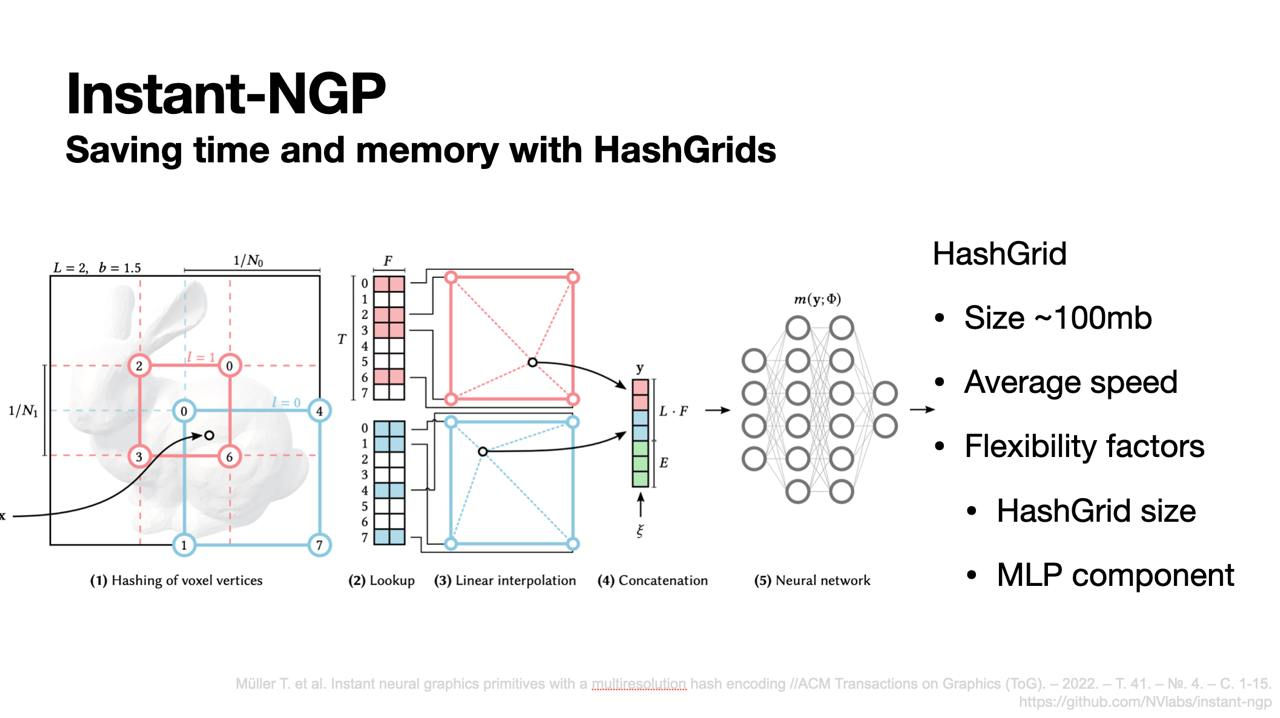

[Instant-NGP](https://arxiv.org/abs/2201.05989) - это сейчас стандарт представления полей, собирающий все вышесказанное. 

Давайте вместо хранения значения представления в узлах решетки заведем хэш-функцию.

Вот хотим в узле решетки посчитать значения представлений, вместо явного хранения в узлах значений, посчитаем хэш индекса решетки и пойдем в хэш-таблицу по значению хэш-функции. В более маленькой хэш-таблицк будем хранить эмбеддинги. 

Когда будем вычислять значения через линейную интерполяцию, к нам в данный индекс через хэш-таблицу с веторами будут приходить из разных точек пространства. Векторы будут зранить в себе много информации, описывая много точек. Обновляем веса нейронки и значения в хэш-таблицах.

Есть несколько уровней масштаба: голубой и розовый (хэш-табилиц столько же). Вот у нас есть точка, смотрим на голубой квадрат. У него рядом 4 узла, берем координаты, считаем хэши, идем хэш-таблицу, берем значения и делаем интерполяцию. Разные точки пространства приходят в одну точку хэш-таблицы, тем самым взяв маленькую хэш-таблицу, мы разряжаем пространство.

Требуется меньше памяти, так как храним только хэш-таблицу меньшую по размеру.

Еще плюс, что хэши быстро считаются на видеокартах и это работает оч быстро из-за хорошой оптимизации под современные архитектуры видеокарт. Еще те же чуваки сделали tiny-cuda-nn, которая в пониженной точности на cuda реализует примитивные нейросети и эмбеддинги, которую можно юзать.


## `Novel View Synthesis with Neural Radiance Fields`

Поговорим, откуда эти самые Neural Radiance Fields поля можно брать. Их получают, решая задачу Novel View Synthesis.

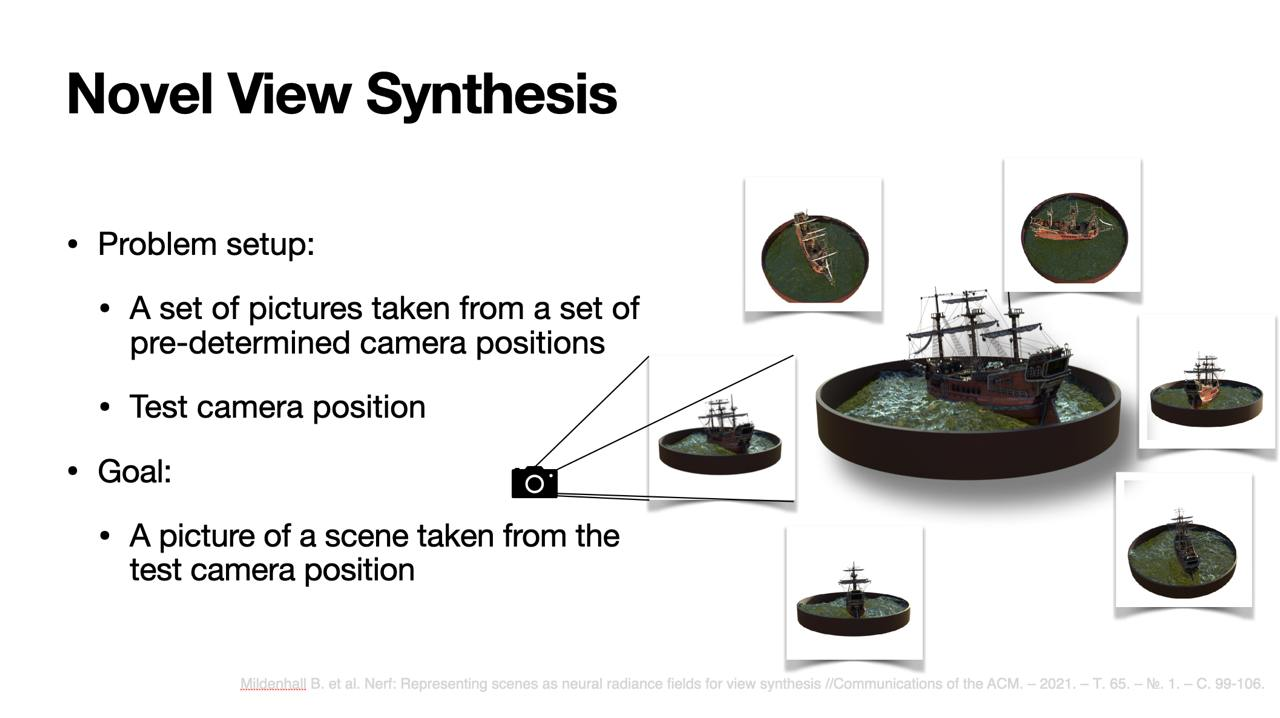

Четкого перевода Novel View Synthesis нет, поэтому буду говорить по-английски.

Что дано? Есть набор изображений, у которых есть ракурсы, с которых они сняты, и внутренние параметры карамеры, то есть процесс формирования изображений нам известен.

Цель научиться генерировать изображения сцены с новых ракурсов, как будто это камера реально стояла на сцене и сделала снимок. 

Критерий качества решения задачи: на отложенной валидационной выборке проверяем сгенерированные виды.

Ничего заранее про геометрию, структуру и т п нам неизвестно, просто хотим научиться генерировать сцену с новых ракурсов.

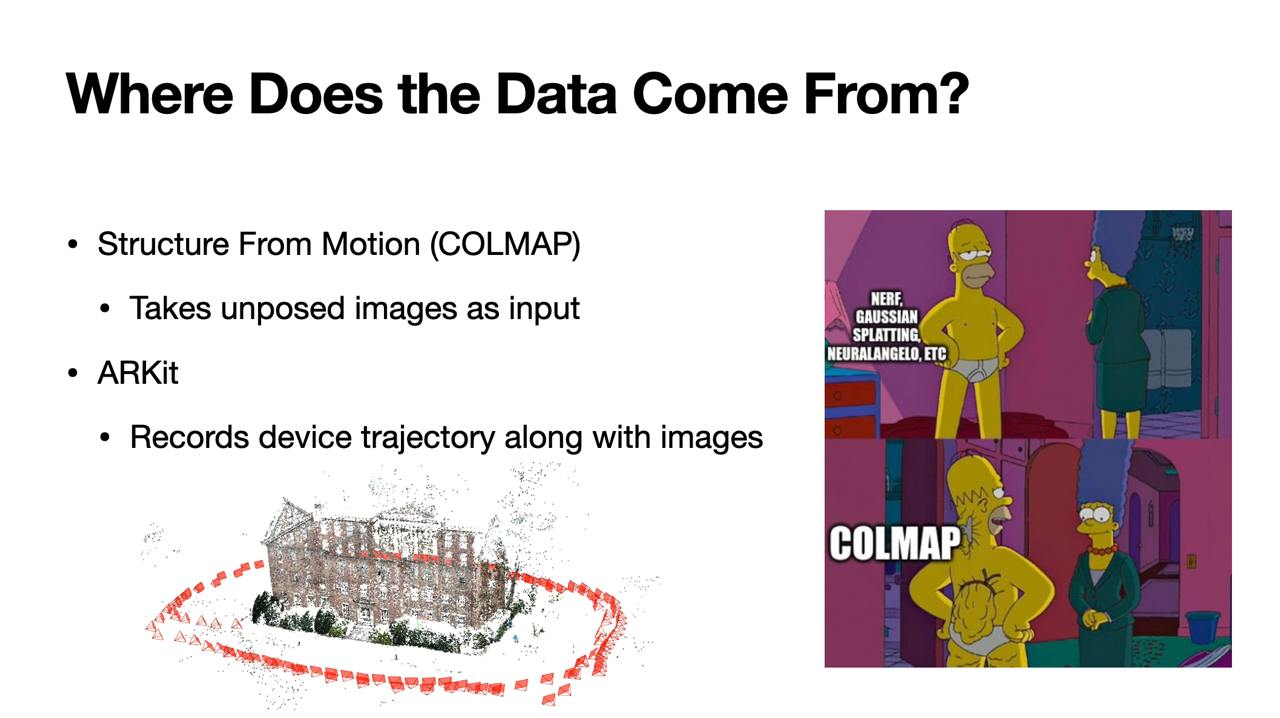

Откуда в такой постановке задачи брать данные?

Часто под ковер спрятан COLMAP. Его используют для предобработки данных. Часто нам поступает на вход набор снимков статичной сцены, снятых с разных ракурсов, подаем их в COLMAP, который примерно прикидывает, как были расположены камеры и какие их внутренние параметры. А дальше можем переходить к решению поставленной задачи.


Другой вариант — ARKit — библиотека от Apple, которая позволяет на основе данных с гироскопа и акселерометра с телефона и того, что снято на видео, примерно прикинуть, где телефон был в пространстве во время съемки. Но проблема в том, что датчики шумные и траектории получаются неточные и требуют доработки.

Глобально два варианта — COLMAP или датчики поверх видео.

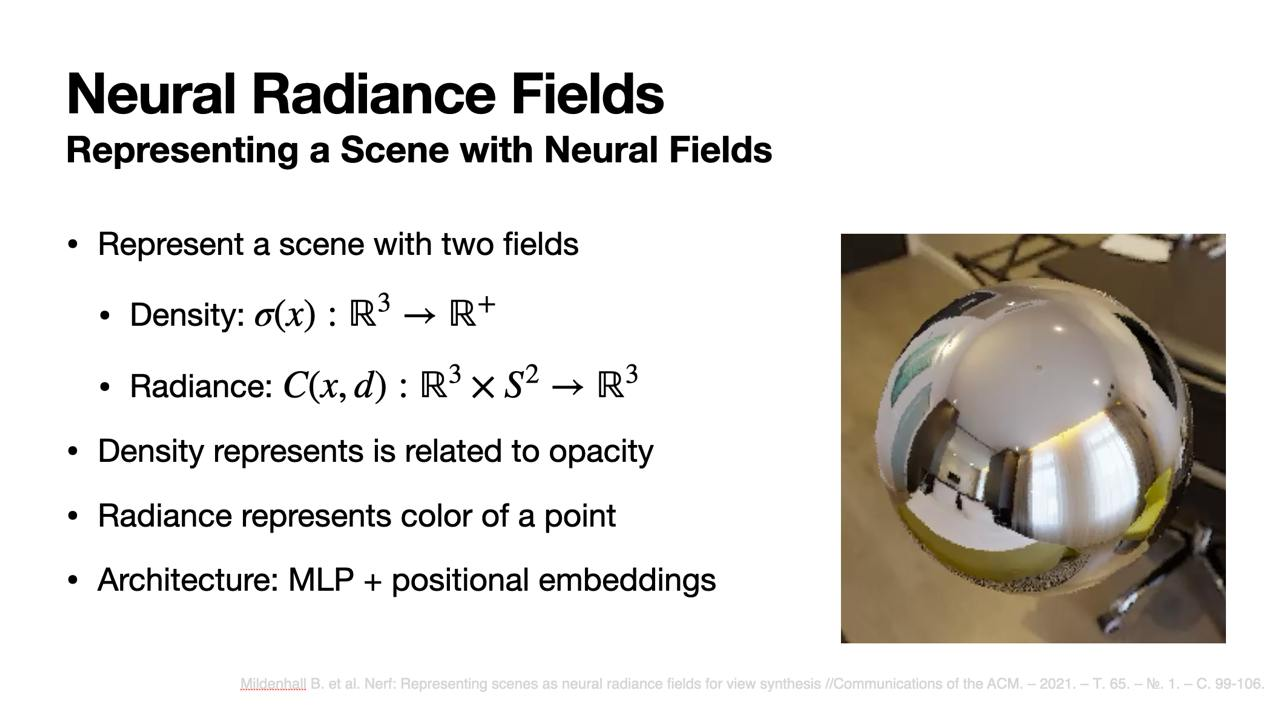

Поговорим про поля, которые нам понадобятся, в таком решении, как Neural Radiance Fields.

Для описания сцены понадобится две вещи:
Геометрия — будем описывать ее с помощью поля плотности. Будем говорить, насколько точка непрозрачна, то есть долю света, которая пропускает данная точка.
Поле светимости — в каждой точке пространства хотим задать, сколько от нее исходит света в направлении d. Направлении важно, так как многие объекты в реальном мире меняют цвет, когда мы смотрим на них под разным углом. 

Есть илюстрация, где при движении меняется цвет зеркального шара (угол отражения равен углу преломления).

Все варианты архитектур, описанных сегодня, применимы. Исторически, в первой статье была MLP + positional embeddings.

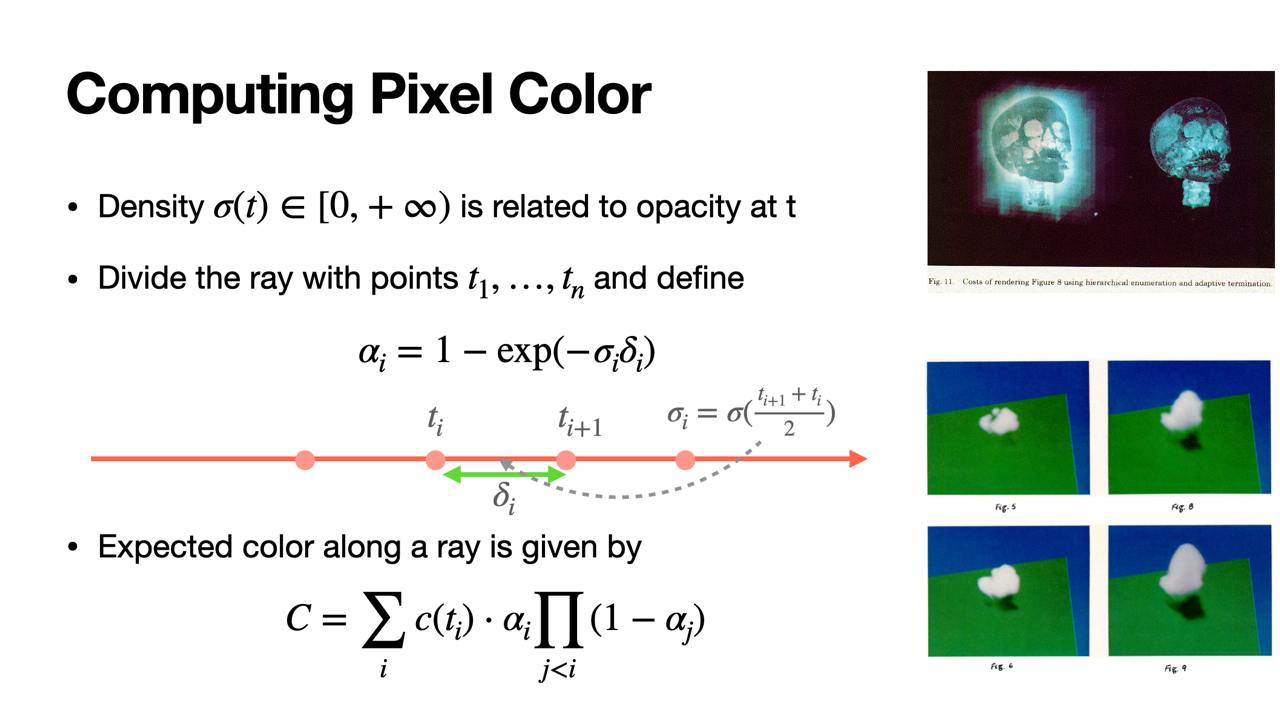

Описали постановку задачи, представление сцены, как рисовать картинку, если есть хорошее начальное приближение картинки.

Алгоритм отрисовки — это ключевой элемент успеха подхода, так как он очень хорош для современного DL и градиентных подходов.

Исторически этот алгоритм возник в литературе по графике, где пытались моделировать объемный эффект в виде облаков или делать визуализацию трехмерных данных (например, МРТ-снимки).

Каждый цвет получен из того, что мы встретим на луче, пока летит в пространстве. Зафиксируем пиксель и из координаты камеры в направлении пикселя выпустим луч. 

Чтобы понять, что на луче находится, возьмем его и разобьем на большое число маленьких участков и в каждом посчитаем плотность и цвет.

Плотность будет говорить о том, есть в данном участке что-то или нет. Есть она 0, то ничего нет. Если большие значения, значит что-то плотное и не пропускающее цвет. 

Важно, что если на луче несколько плотных точек, то мы будем видеть тот, что ближе к камере, то есть порядок по глубине надо учитывать. Алгоритм, учитывающий этот порядок в дискретном случае называется alpha compositing и он складывает цвет на луче по приведенной ниже формуле.

Поле сигма отображается в альфу, которую встречаем в альфа канале изображений. Альфа принимает значения от 0 до 1. Если сигма большая => альфа = 1, что-то непрозрачное. Если сигма маленькая => альфа = 0, что-то прозрачное.

Дальше эти альфы собираются в формулу снизу. Явно учитывает порядок обхода луча. Важно, что веса цветов учитывают не только прозрачность текущей точки, но точек до нее на луче.

За эти алгоритмом стоит физический процесс распространения физического света в пространстве, дискретный случай которого представлен на слайде. 

Все дифференцируемо, градиенты хорошие и все сходится.



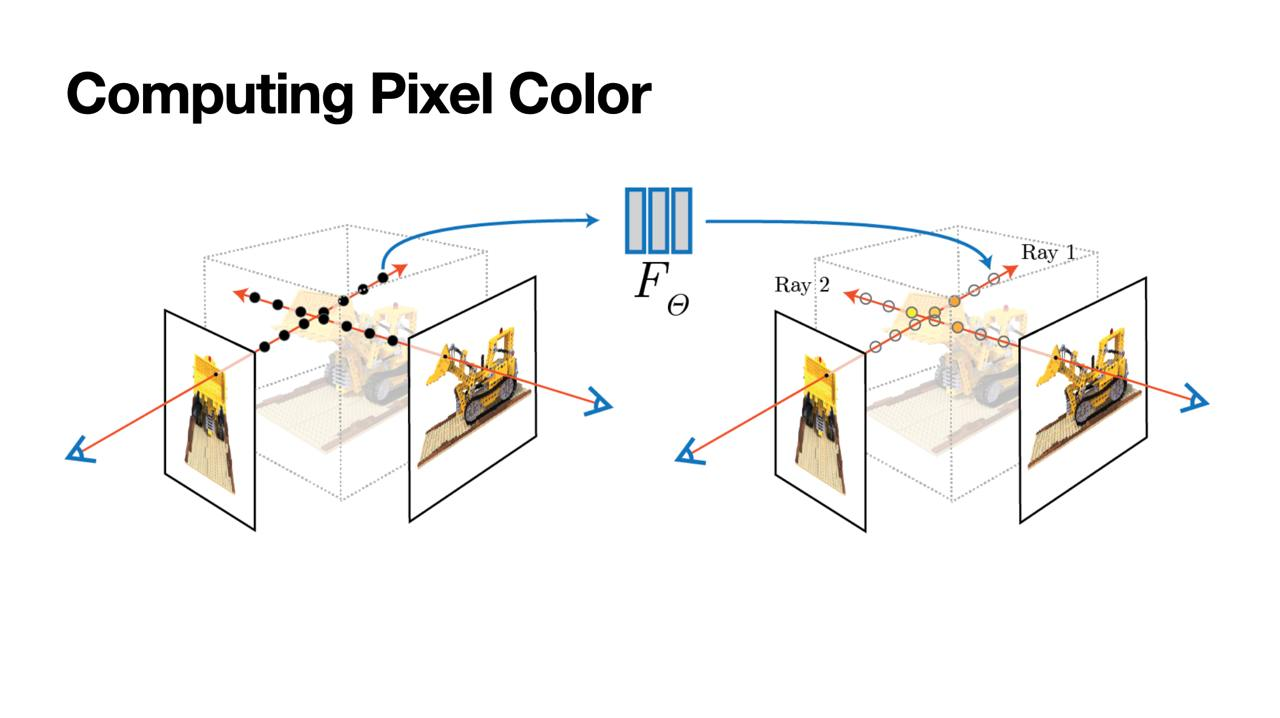

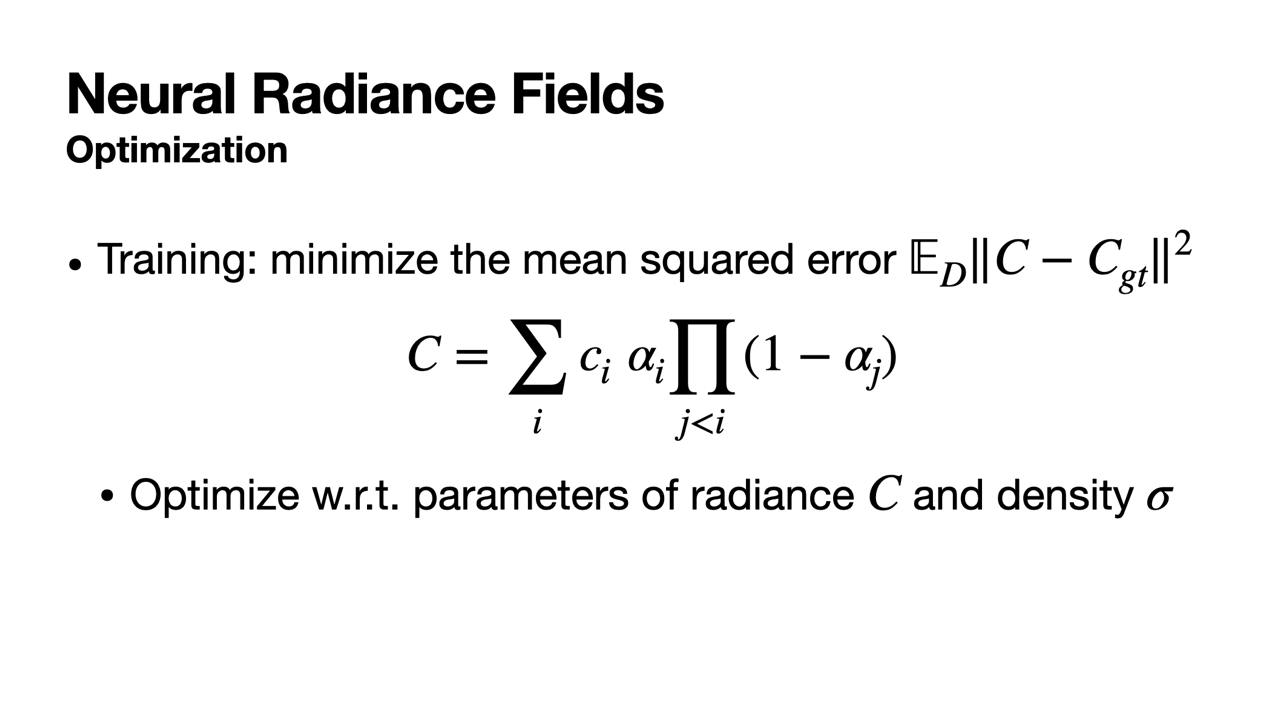

Традиционно задача Novel View Synthesis решается минимизацией квадрата разницы между картинкой из train и картинки, которые мы нарисовали по текущему полю плотности и светимости.

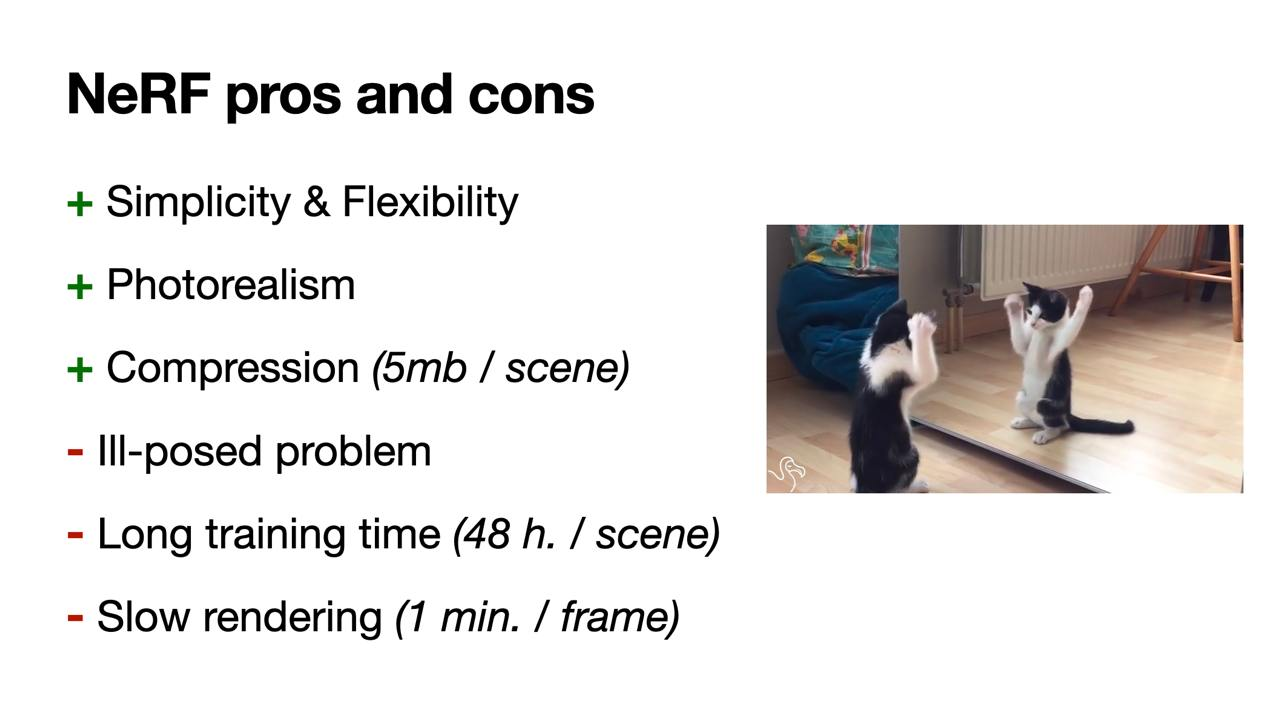

Гибкость — исходную постановку можно модифицировать для других задач. 

Данных обычно используется больше при обучении, чем вес модели.

Постановка задачи не совсем корректная: это два кота друг напротив друга или кот напротив зеркала. Можно нам понять по косвенным причинам, а как модели понять? Не все так однозначно, как говорится.

Дальше поговорим про улучшения и применения представленной модели.

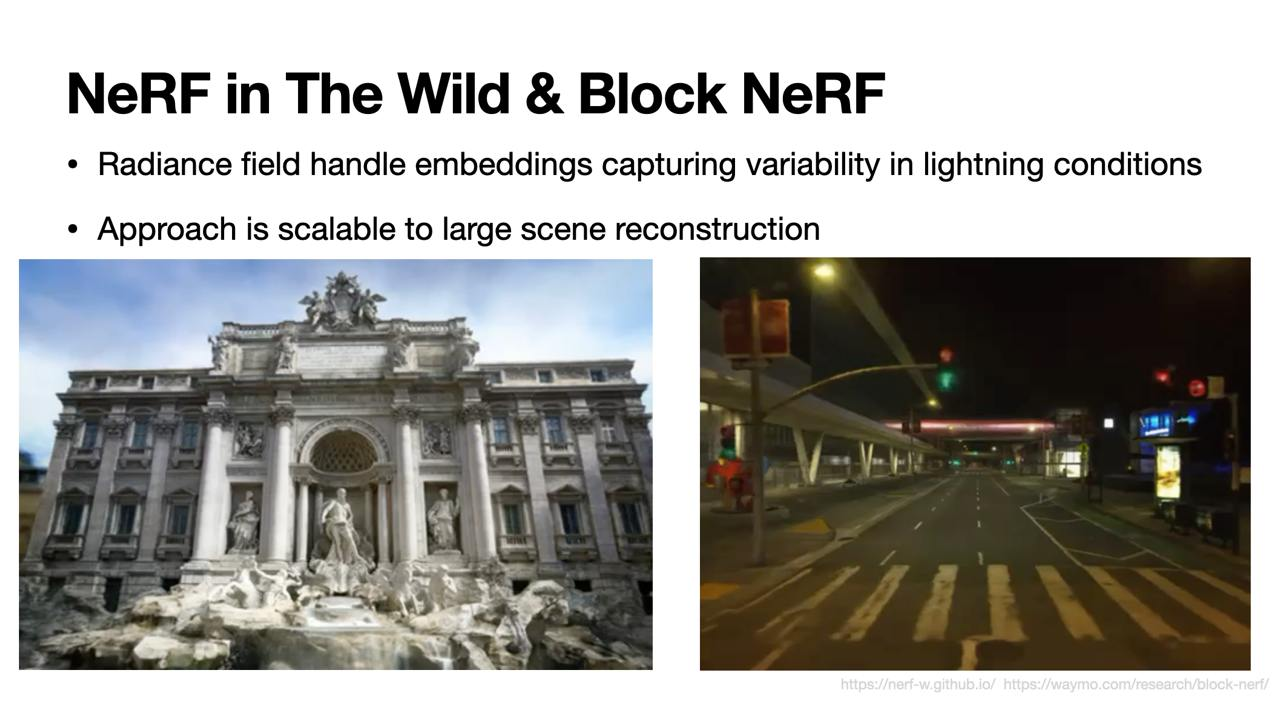

Поле светимости выучивается нейронкой. Можно это использовать.

Сцены не всегда статичны, может меняться освещение в реальных данных. Давайте в модель с каждым кадром обучающей выборки подавать эмбеддинг кадра, кодирующего время дня (по факту освещение кадра), так получим поле светимости, также зависящие от доп параметров освещения сцены для данного момента времени (эти эмбеддинги можно выучивать). Геометрию же сцены можно представлять с помощью поля, которое не зависит от времени. 

NeRF in the wild. Берем кучу разных кадров из интернета и пытаемся выучить модель фонтана Треви (Рим), но с учетом разные снимки получены в разное время при разном освещении. Получилась динамичная сцена, которая может менять освещение. 

Block NeRF. Та же самая идея, но практичнее — это реконструкция города Сан-Франциско ребятами из Waymo (беспилотники). Данные из google street view. Одной сеткой не представишь, там хитрее устроено. Можно использовать для обучения беспилотников — имеем фотореалистичные данные, покрывающие все многообразие освещений.


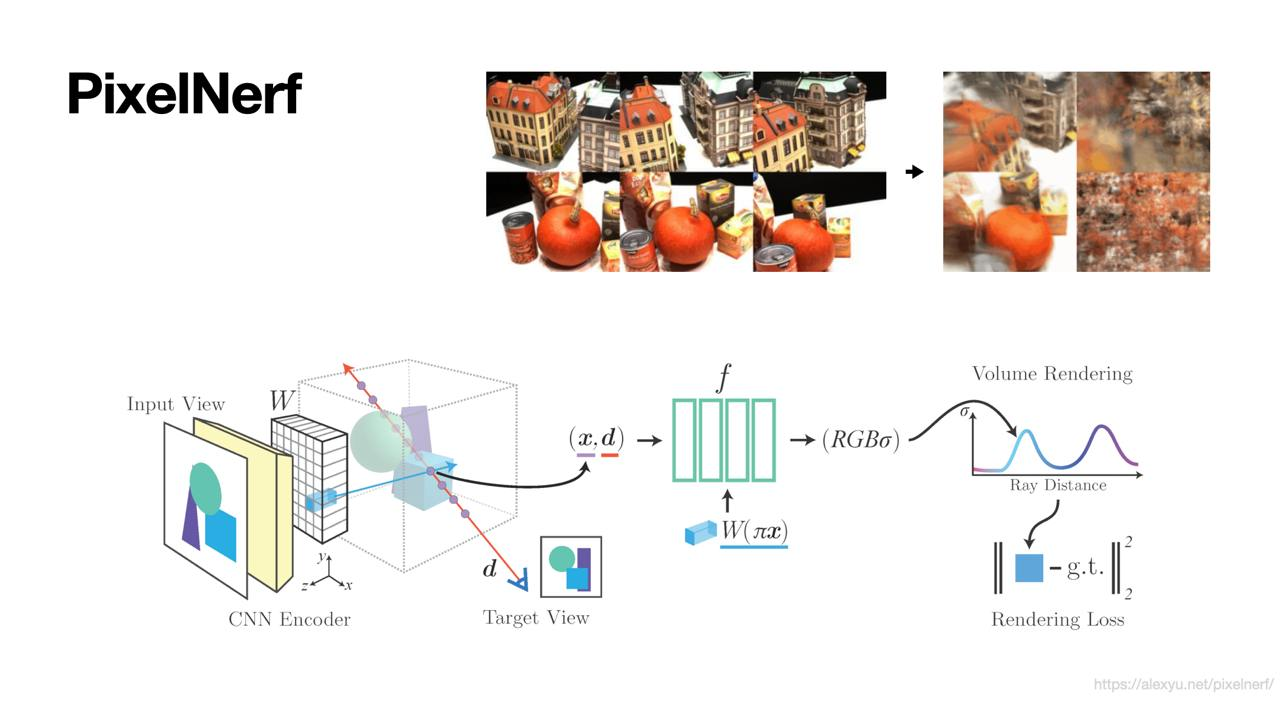

У нас в задаче одно поле — это одна сеть, которую мы выучиваем. Немного экзотично для ДЛ. Возникает вопрос, а можно выучить одну сеть, которая будет рисовать все, что мы захотим в 3Д?

[Ответили на вопрос в Berkley.](https://arxiv.org/abs/2012.02190) Давайте решать задачу во few-shot режиме, то есть на вход будет приходить несколько кадров, а не сотни. Будем учить мета-сеть, которая по трем кадрам будет рисовать реконструкцию сцены. Делать это будем с помощью энкодера, который будем учить. 

Будем изображения кодировать с помощью какой-то backbone сети (например, предобученный resnet). Теперь в запускаемом луче плотность и цвет будем обуславливать еще на эмбеддинги точки пространства, исходя из представления на основе тех поданных картинок в условии.

Будем проецировать точку на луче на картинку данную, посчитаем на проекции эмбеддинг и его используем в MLP. Таким образом, реконструируя каждую сцену будем считать эмбеддинги по сложному геометрическому правилу, объединять их и подавать в одну общую глобальную сеть для всех сцен, тем самым реконструируя нужную нам сцену. 

Хорошо обобщается, но в оригинальной статье пробовали на ограниченном наборе данных.

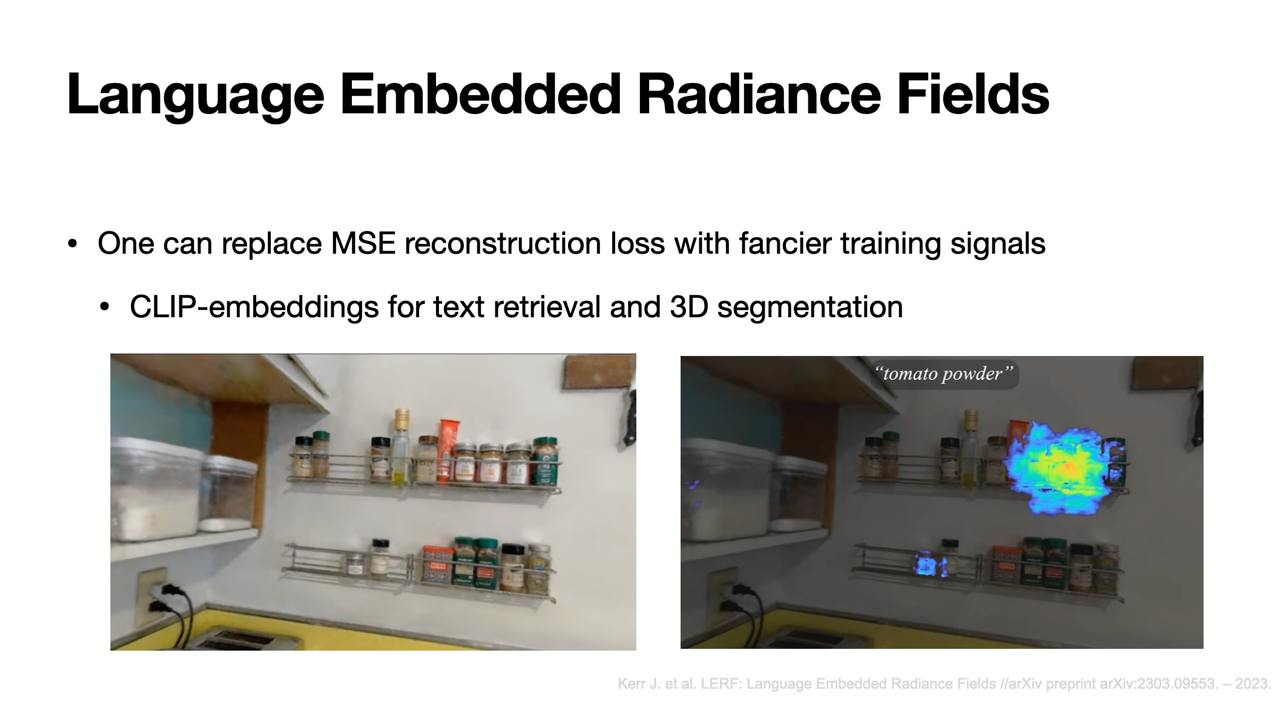

У нас в принципе могут быть не только поля светимости, могут быть вообще любые поля.

Как пример, эта [работа](https://arxiv.org/abs/2303.09553) предлагает выучить поля из clip представлений картинок. Объяснить CLIP. 

Получаем, что если представления вещи и ее описания будут похожи между собой.  Считаем CLIP-представления для маленьких кусочков сцены и потом использовать их взамен цвета.
В общем можно выучивать поля CLIP-эмбеддингов и для таких полей брать текст того, что мы хотим найти на сцене и считать скалярное произведение пикселей с эмбеддингом текста и получать тепловую карту с нужной вещью. Работает для 3хмерных сцен. Робот теперь может принести стакан воды.

## `Improving Base Model: Time`

Хоть модель и хороша, она очень медленно работает. Учится сутки, рисует кадр за минуту … Обсудим то, как улучшить модели.

Давайте поговорим о том, как улучшить скорость работы модели. 

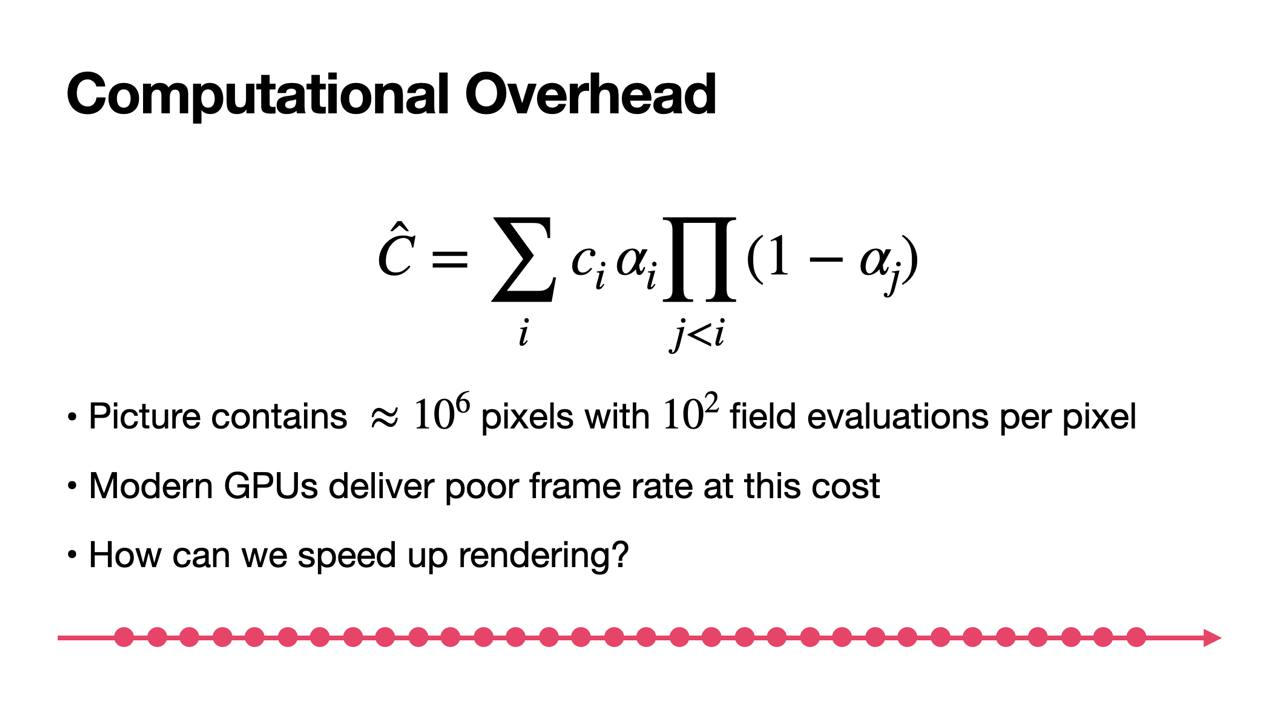

Алгоритм рисовки — сумма с большим числом слагаемых, для каждого надо вызвать нейронку. 

Сотни миллионов вычислений, что медленно даже с учетом современного железа.

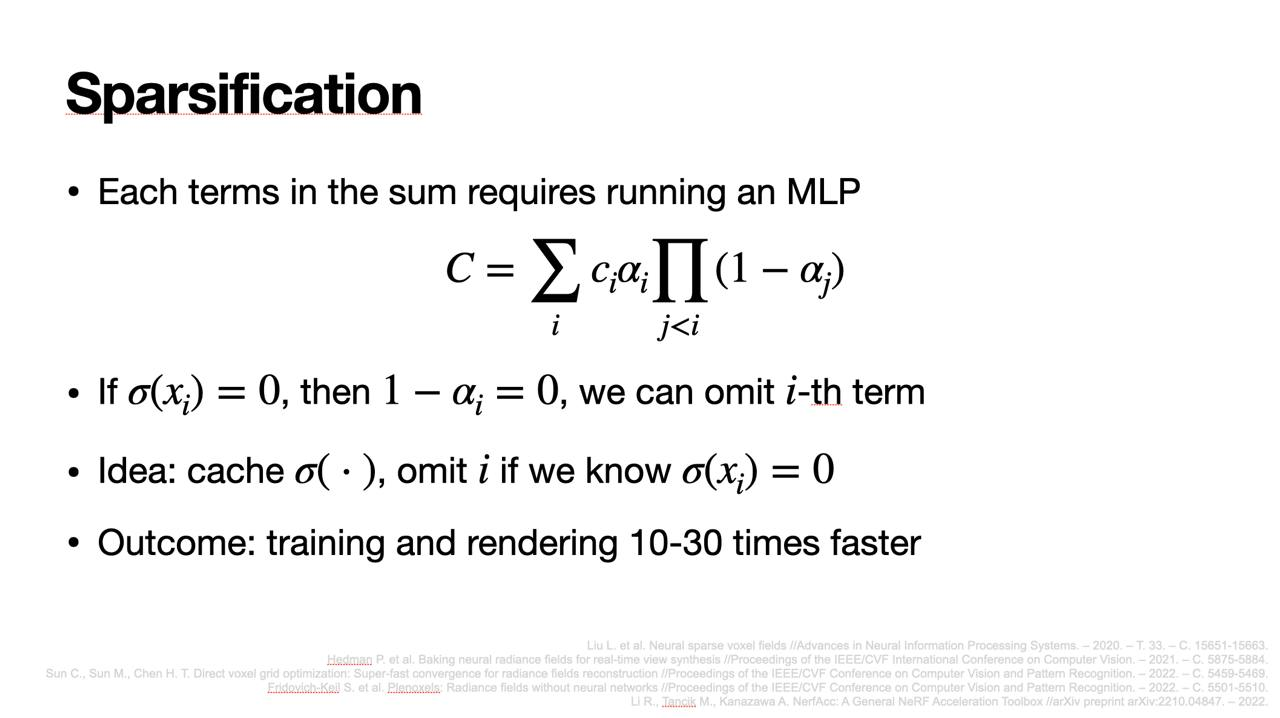

Давайте вернемся в сетап одной сцены - одной модели. 

Устоявшееся решение — пропускать пустые участки пространства (например, с помощью булевой сетки) и если встретили что-то непрозрачное, дальше можно не считать.

Объем во время обучения формируется равномерно, поэтому мы давольно рано начинаем понимать, где чего есть или нет.

Ускорение на порядок.

Идея есть в большом числе работ, на слайде приведены часть этих работ.

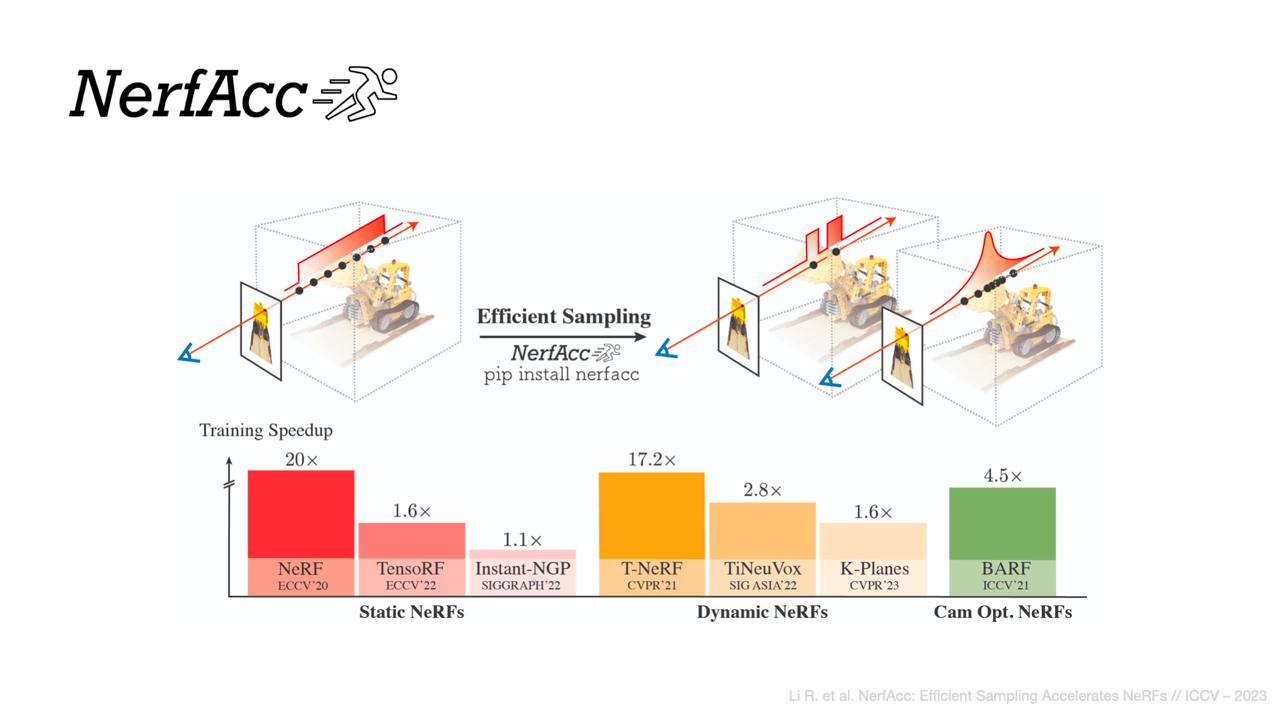

Венцом всех ускорений стала либо [NerfAcc](https://arxiv.org/abs/2210.04847), которая идеи с разреживаниями реализует в хорошей абстракции.

Базовый нерф ускоряют в 20 раз. 

## `Improving Base Model: Fidelity`

Дальше поговорим о качестве.


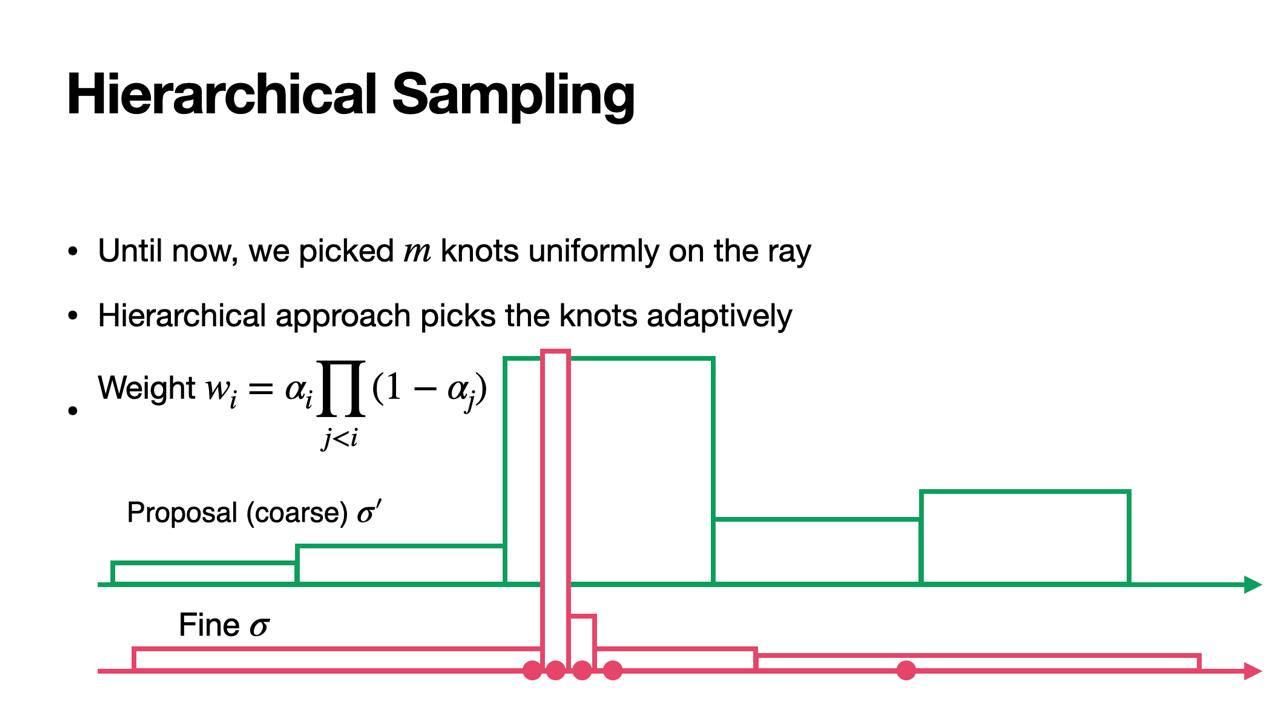

Чтобы точно покрыть сцену нам нужно много точек на луче. 

Еще в оригинальной статье придумали иерархичекое сэмплирование точек на луче. Наивно — равномерно покрыть луч и считать с=значения в каждой точке. 

Идея: заведем маленькую сетку плотности разреженную, которая будем говорить, есть ли что-то в общих чертах или нет и сэмплировать точки в зависимости от весов этой сетки (веса w). Есть что-то — больше узлов, нет — меньше узлов. 

Точнее покрываем луч, да еще и экономнее.

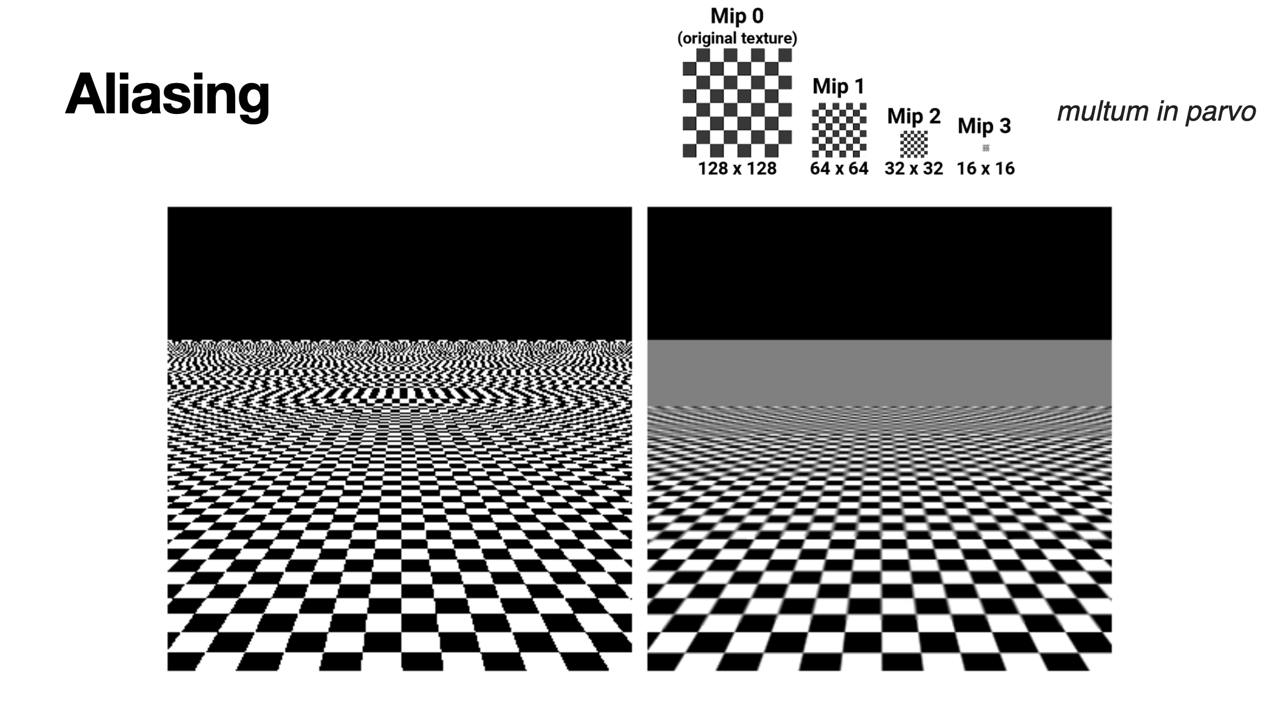

Aliasing — это артефакт дискретизации, возникающий при представлении непрерывных сигналов (изображений, звука и т. д.) в дискретной форме. 

В компьютерной графике алиасинг проявляется в виде "зазубренных" краев, мерцания и других искажений при рендеринге изображений с высоким уровнем детализации.


В контексте NeRF проблема алиасинга возникает из-за того, что пиксели камеры на самом деле покрывают не одну точку в пространстве, а некоторую область (конус).  рядом с камерой он покрывает большие участки сцены, а в 10 метрах от камеры, пиксель покрывает пропорциально больший участок сцены.

Однако стандартный NeRF делает выборку света только в отдельных точках вдоль лучей, игнорируя тот факт, что пиксель охватывает большее пространство. Это приводит к потере информации и появлению артефактов. То есть если наш луч улетит далеко и будет считать цвет на дальних участках, он посчитает нерепрезентативный, так как надо учитывать цвет всего учатска, а не только его цвета.

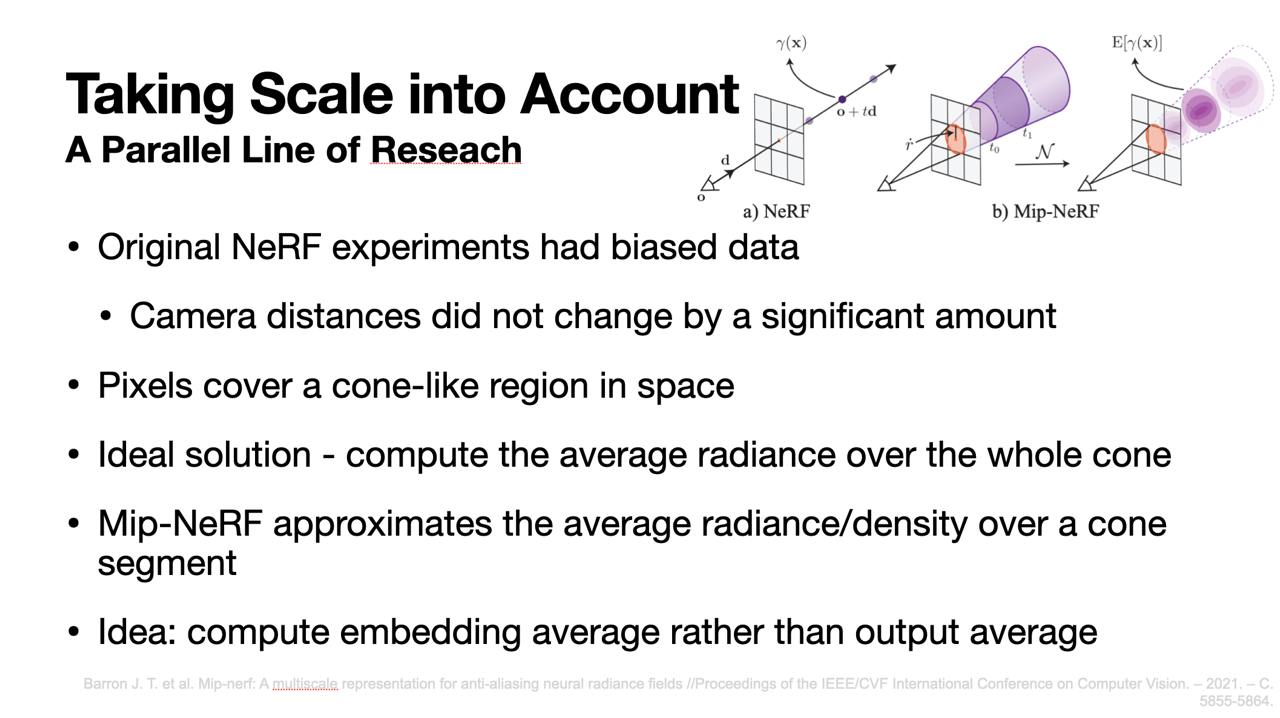

В отличие от обычного NeRF, который обрабатывает каждый пиксель как тонкий луч и берет выборки точек вдоль этого луча, Mip-NeRF рассматривает пиксель как конусовидный объем в пространстве, расширяющийся с увеличением расстояния. Вместо обработки отдельных точек, [Mip-NeRF](https://arxiv.org/abs/2103.13415) математически представляет весь объем как 3D гауссово распределение и вычисляет для него интегрированное позиционное кодирование — единый эмбеддинг, содержащий информацию обо всем объеме сразу. Это позволяет корректно учитывать масштаб и избегать артефактов алиасинга при изменении расстояния до объектов, что невозможно в обычном NeRF, где каждая точка рассматривается изолированно, без учета её окружения.

Этот нюанс критичен для работы с реальными данными, а не синтетическими.

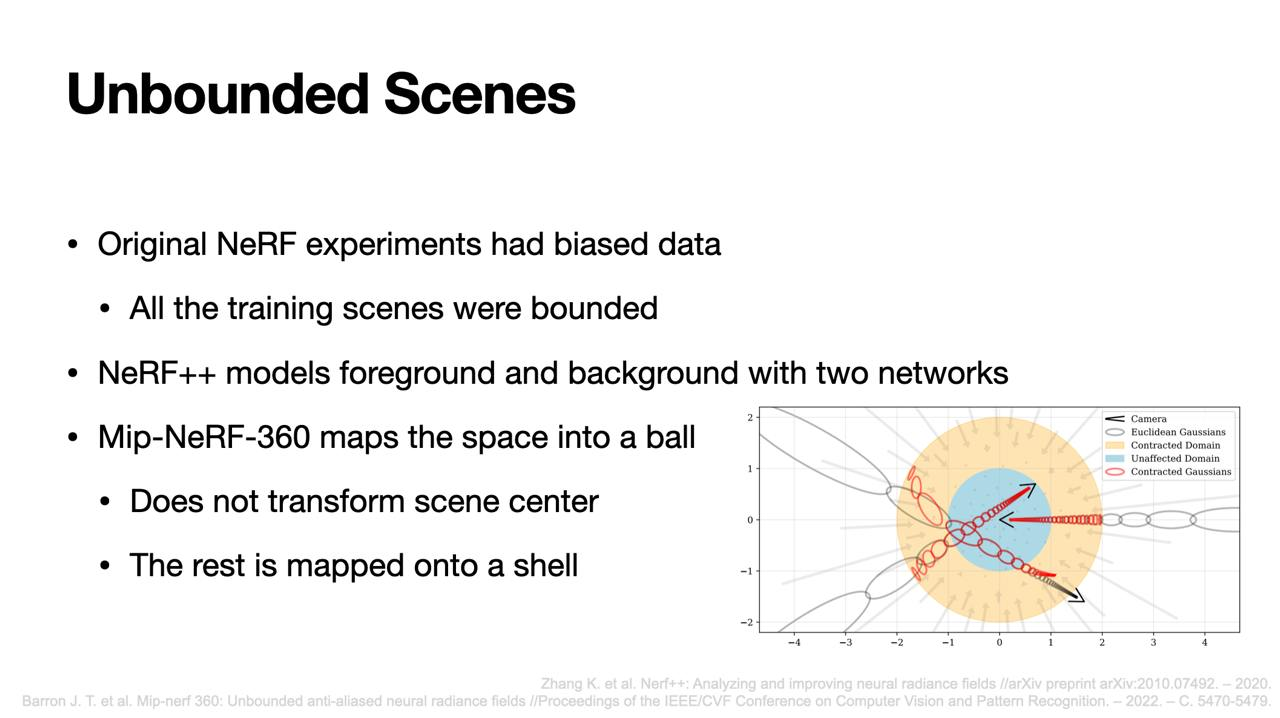

Еще один момент, который не учитывается в ванильных нерфах, что непонятно, где реальные сцены заканчиваются. 

Мы пускаем луч, а где его останавливать? На сценах есть гиперпараметр метода, который говорит, что пора остановиться.

Вобще взоды нейронки нормированы, от 0 до 1. Подавать координаты огромные чревато nan’ами. 

Оригинальные эксперименты с NeRF были ограничены фиксированными пространствами, что создавало предвзятость в данных и затрудняло моделирование неограниченных сцен. Для решения этой проблемы [NeRF++](https://arxiv.org/abs/2010.07492) использует две сети для раздельного моделирования переднего и заднего планов, а [Mip-NeRF-360](https://arxiv.org/abs/2111.12077) применяет метод отображения пространства в сферу: центр сцены остается неизменным, а остальная часть сжимается и проецируется на оболочку, что позволяет корректно обрабатывать большие и бесконечные сцены без артефактов.

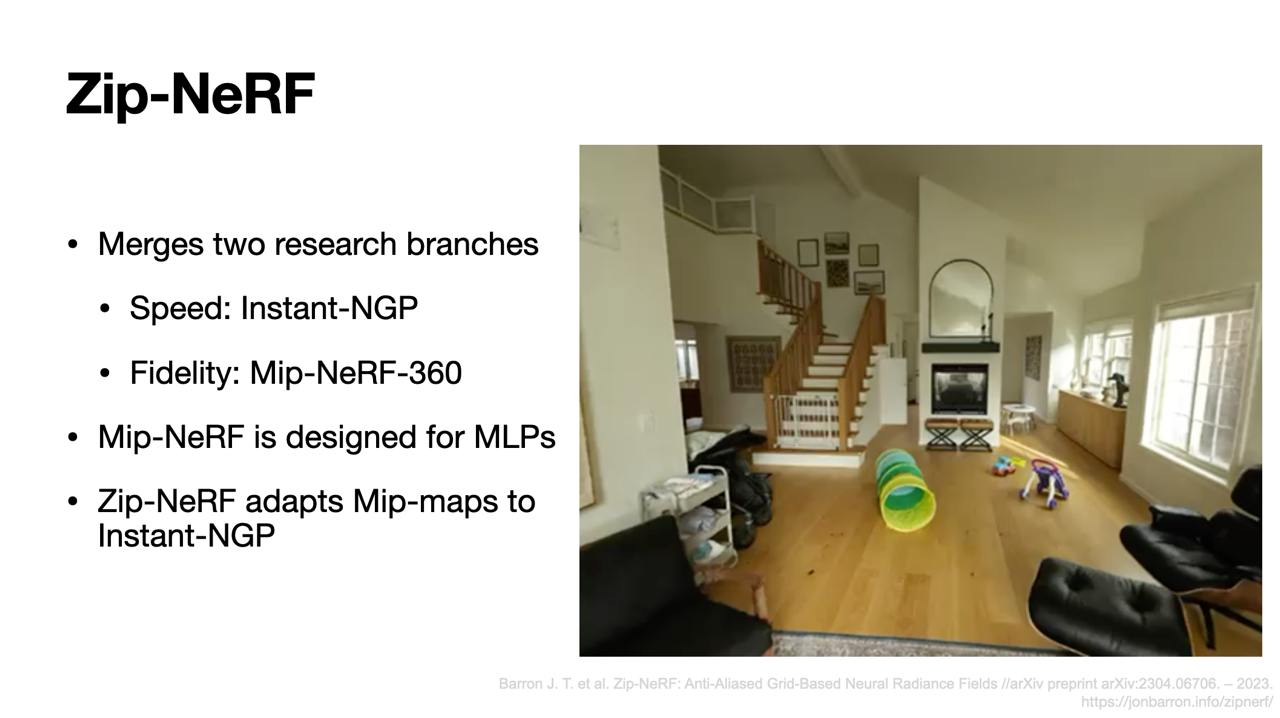

Апогея всех идей - [Zip-NeRF](https://arxiv.org/abs/2304.06706). Быстрое и гибкое представление. Сцена нарисована, но можно понять, что это генерация по косякам в отражениях. 

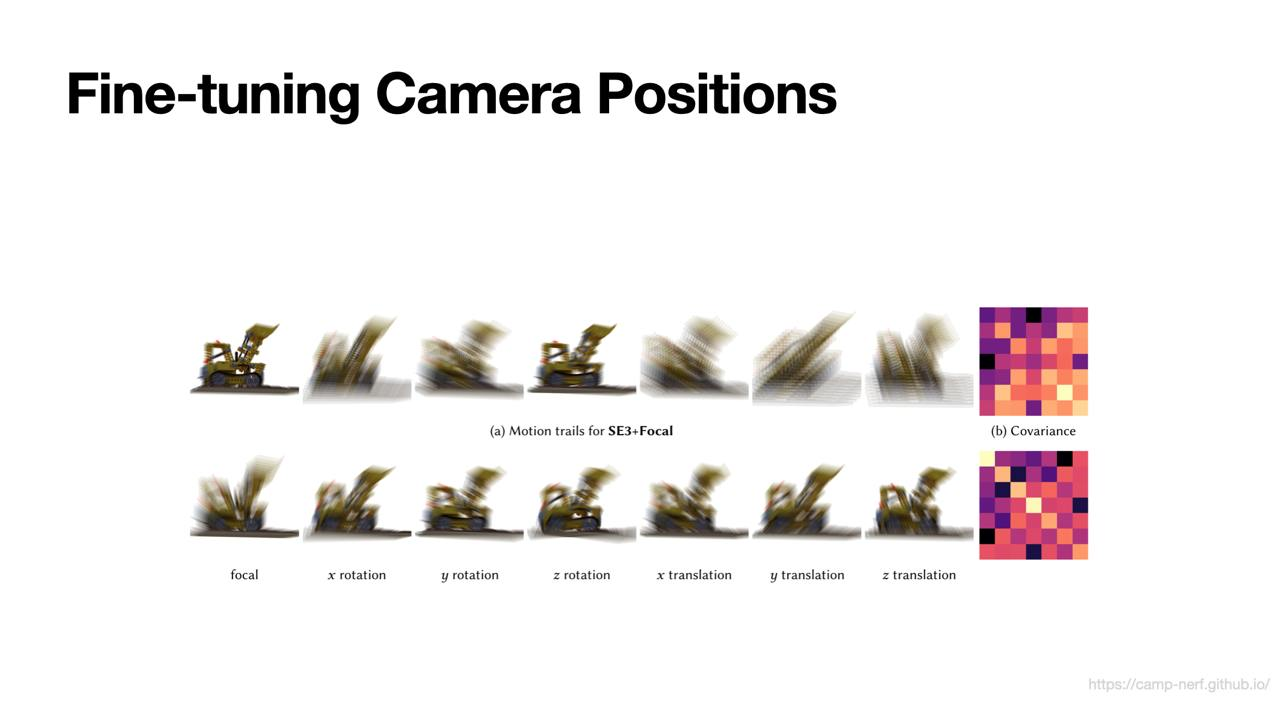

Еще есть работа [CamP](https://arxiv.org/abs/2308.10902). Позиции камеры COLMAP восстанавливает неидеально, датчики движения тоже неидеальны.

Алгоритм рисовки дифференцируем не только по плотности и цвету, но и по параметрам камеры — их также можно донастраивать с помощью градиентного спуска. 

Изменения камеры по разным координатам могут быть разного масштаба, мы пытаемся все свести к одному.  